In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:
df=pd.read_csv('bank-full.csv', sep= ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
X = df.drop('y', axis=1)
y = df['y']


In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=5)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [8]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = dt.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8742673891407718
              precision    recall  f1-score   support

          no       0.93      0.93      0.93      7997
         yes       0.46      0.46      0.46      1046

    accuracy                           0.87      9043
   macro avg       0.69      0.69      0.69      9043
weighted avg       0.87      0.87      0.87      9043




Hyperparameter Tuning using GridSearchCV



In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [10]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

In [11]:
dt = DecisionTreeClassifier(random_state=42)


In [12]:
grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=4,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [13]:
grid.fit(x_train, y_train)

Fitting 4 folds for each of 576 candidates, totalling 2304 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=1)

In [14]:
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV Accuracy: 0.900519796505198


In [15]:
best_dt = grid.best_estimator_


In [16]:
from sklearn.metrics import accuracy_score

y_pred = best_dt.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.9019130819418335


Visualize the Full Decision Tree

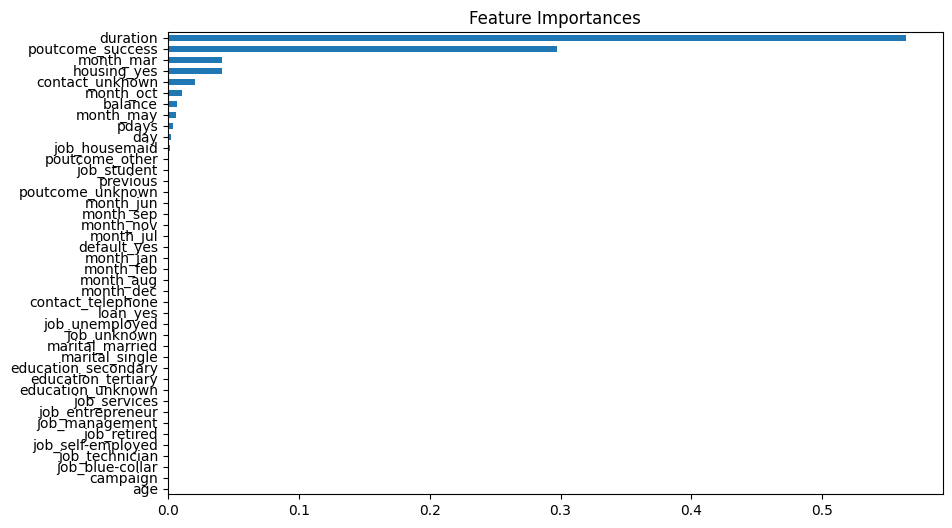

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(best_dt.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importances")
plt.show()


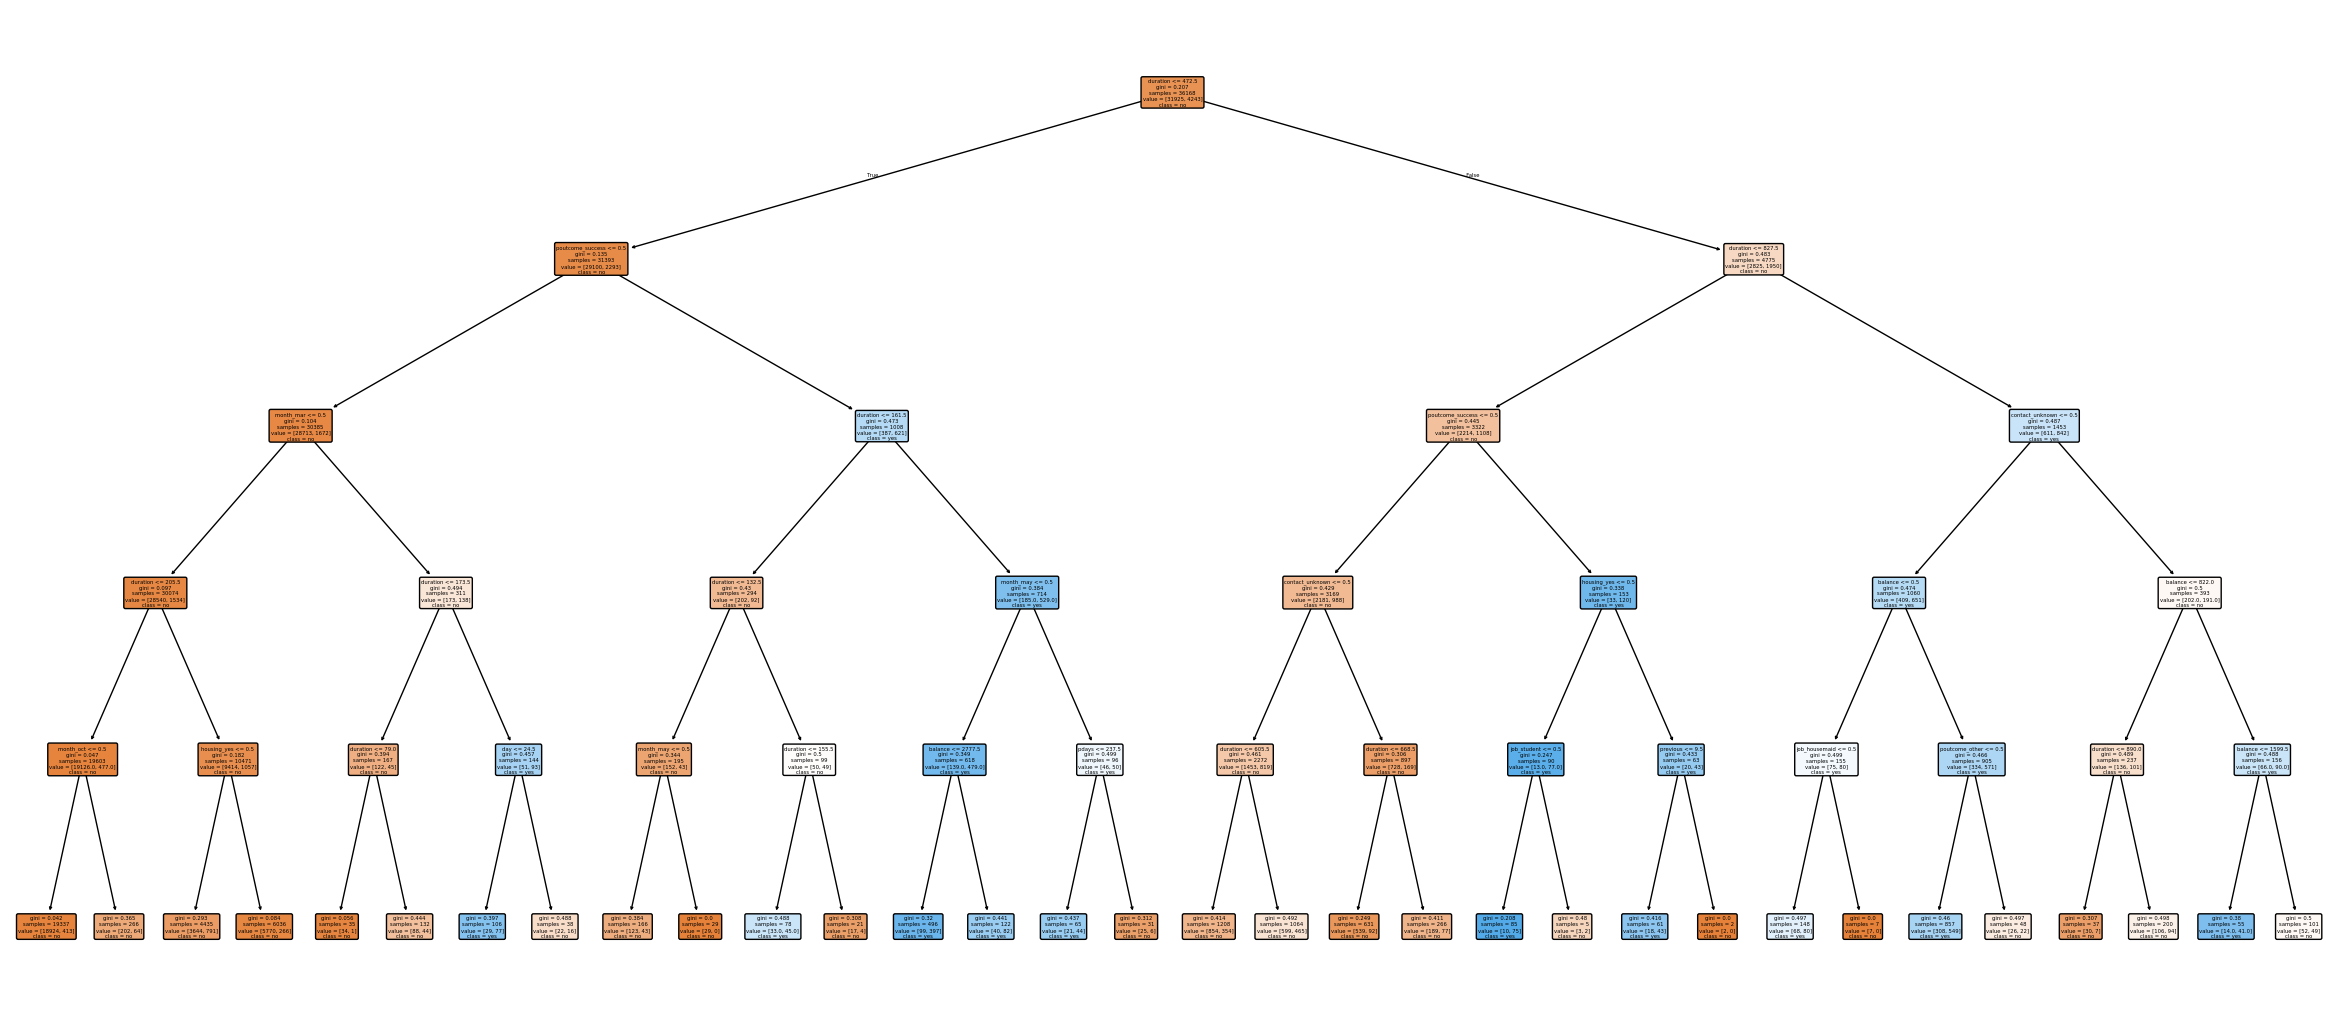

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(30, 13))
tree.plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=["no", "yes"],
    filled=True,
    rounded=True,
)
plt.show()


save this model

In [19]:
import joblib

# Suppose 'grid_search' is your GridSearchCV object
best_dt = grid.best_estimator_

# Save the model
joblib.dump(best_dt, "bank_marketing_tree.pkl")


['bank_marketing_tree.pkl']